# Formula Cheat Sheet

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
import statsmodels.api as sm
from statsmodels.formula.api import ols, glm
from sklearn.datasets import make_regression
from IPython.display import display

graph.style.use('fivethirtyeight')

# Simple Regression

$Y=mX+b$

```y ~ x```

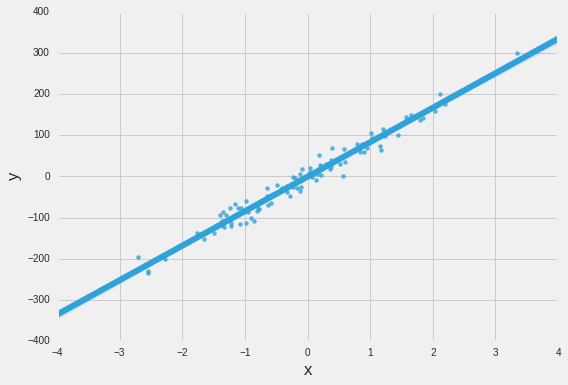

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3323.
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.03e-77
Time:                        17:01:07   Log-Likelihood:                -423.94
No. Observations:                 100   AIC:                             851.9
Df Residuals:                      98   BIC:                             857.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6054      1.697     -0.357      0.7

,df,sum_sq,mean_sq,F,PR(>F)
x,1.0,955353.918992,955353.918992,3322.975921,2.032963e-77
Residual,98.0,28174.951093,287.499501,NaN,NaN


In [2]:
x, y = make_regression(n_features=1, n_informative=1, n_targets=1, noise=20)

data = pd.DataFrame(y, columns=['y'])
data['x'] = x
                 
sns.regplot(data['x'], data['y'])
graph.show()

# X should be significant
model = ols('y ~ x', data=data).fit()
print(model.summary())
display(sm.stats.anova_lm(model))

And you expect that there is no interaction between the 2 then

$y = mX_1 + mX_2 + b$

```y ~ x1 + x2```

(100, 2) (100,)


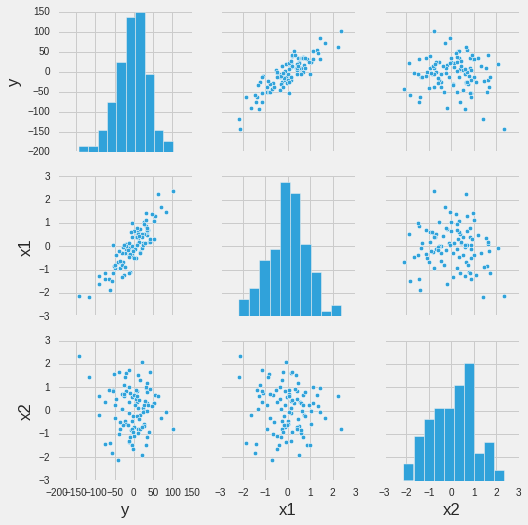

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     149.2
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           2.52e-30
Time:                        17:04:49   Log-Likelihood:                -442.04
No. Observations:                 100   AIC:                             890.1
Df Residuals:                      97   BIC:                             897.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -3.4984      2.047     -1.709      0.0

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,124472.712957,124472.712957,298.411231,2.337167e-31
x2,1.0,0.221441,0.221441,0.000531,9.816650e-01
Residual,97.0,40460.451492,417.118057,NaN,NaN


In [5]:
x, y = make_regression(n_features=2, n_informative=1, n_targets=1, noise=20)
print(x.shape, y.shape)

data = pd.DataFrame(y, columns=['y'])
data['x1'] = x[:, 0]
data['x2'] = x[:, 1]

sns.pairplot(data)
graph.show()

model = ols('y ~ x1 + x2', data=data).fit()
print(model.summary())
display(sm.stats.anova_lm(model))

If you expect that there is an interaction

$y = mX_1 + mX_2 + m X_1 X_2 + b$

```y ~ x1 * x2```

Sometimes you only want the interaction

$y = m X_1 X_2 + b$

```y ~ x1 : x2```

(100, 2) (100,)


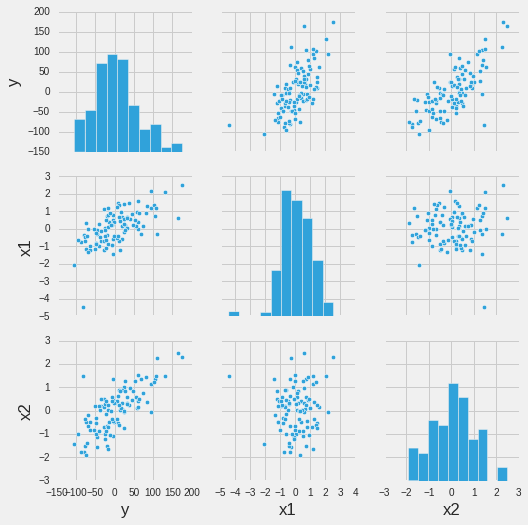

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     301.5
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.04e-48
Time:                        17:11:00   Log-Likelihood:                -428.46
No. Observations:                 100   AIC:                             864.9
Df Residuals:                      96   BIC:                             875.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.3780      1.800     -0.765      0.4

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,129808.105122,129808.105122,404.078939,3.548796e-36
x2,1.0,160660.061478,160660.061478,500.117825,7.586383e-40
x1:x2,1.0,50.091347,50.091347,0.155929,6.938085e-01
Residual,96.0,30839.464505,321.244422,NaN,NaN


In [11]:
# x, y = make_regression(n_features=2, n_informative=3, n_targets=1, noise=20)
print(x.shape, y.shape)

data = pd.DataFrame(y, columns=['y'])
data['x1'] = x[:, 0]
data['x2'] = x[:, 1]

sns.pairplot(data)
graph.show()

model = ols('y ~ x1 * x2', data=data).fit()
print(model.summary())
display(sm.stats.anova_lm(model))

# Extras

If you want to separate something by a Nominal/Categorical variables or you have a variable you want to be treated as a Categorical variable (eg: row number on a plane, etc).

Use `C(variable)`. **Note** this pools all unique values in 'variable'.

Formula example:

$y_{X_2^{i}} = mX_{X_2^{i}} + b$

`y ~ x1 + C(x2)`

Check out the Practise test for an example

**AIC** (Akaike information criterion) is a score that describes the quality of a model. For simplicity just know that greater the number to better. 